In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from collections import OrderedDict

import numpy as np
import matplotlib.pyplot as plt
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

from torchvision import datasets, transforms
torch.manual_seed(0)

In [2]:
# https://discuss.pytorch.org/t/view-classify-in-module-helper/30279/6

def view_classify(img, ps):

    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

In [92]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5),(0.5))])

trainset = datasets.MNIST("MNIST_data/", download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=True)

testset = datasets.MNIST("MNIST_data/", download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=16, shuffle=True)

In [35]:
import pandas as pd
pd.Series(trainset.targets.numpy()).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [15]:
dataiter = iter(trainloader)

In [16]:
images, labels = dataiter.next()

In [17]:
labels.shape

torch.Size([16])

In [18]:
labels

tensor([6, 8, 8, 7, 8, 0, 0, 5, 6, 0, 0, 3, 5, 8, 1, 6])

In [19]:
img = images[0]

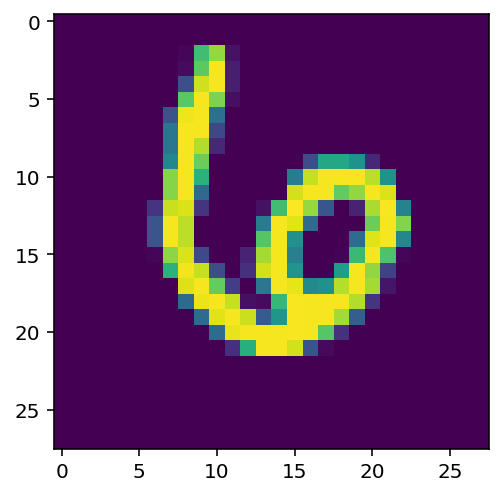

In [20]:
plt.imshow(img.squeeze())

In [25]:
28*28

784

In [54]:
images.shape

torch.Size([16, 1, 28, 28])

In [ ]:
import torch.nn.functional as F

In [49]:
# Defining the layers, 32, 16, 10 units each
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 10)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = x.view(x.shape[0], 784)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        return x
    
model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=10, bias=True)
  (relu): ReLU()
)

In [83]:
torch.tensor([1,3,4,5,6,7,0,1], dtype=torch.float32)

tensor([1., 3., 4., 5., 6., 7., 0., 1.])

In [84]:
torch.tensor([1,3,4,5,6,7,0,1]).dtype

torch.int64

In [113]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [100]:
epochs = 1
print_every = 1000
for e in range(epochs):
    running_loss = 0
    print(f"Epoch:{e+1}")
    for i, (images, labels) in enumerate(iter(trainloader)):
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        running_loss += loss.data.numpy()
        loss.backward()
        optimizer.step()
        if i % print_every == 0:
            print(f"Epoch: {e+1}, loss: {running_loss/print_every}")
            running_loss = 0
        

Epoch:1


RuntimeError: mat1 and mat2 shapes cannot be multiplied (448x28 and 784x32)

In [43]:
images, labels = next(dataiter)

In [44]:
img = images[0]

In [73]:
ps = model(img)

In [61]:
img.shape

torch.Size([1, 28, 28])

tensor([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], grad_fn=<SoftmaxBackward>)

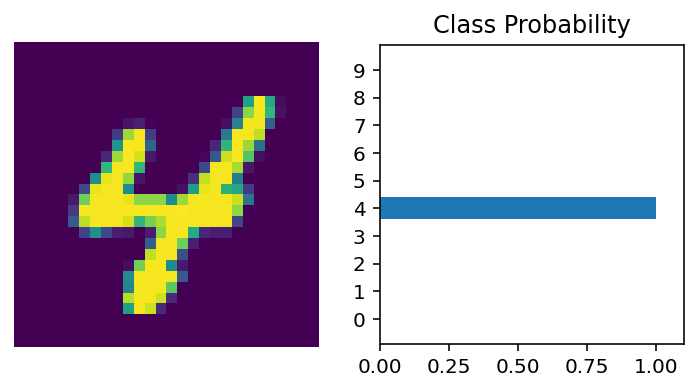

In [75]:
view_classify(img, ps)

In [ ]:
epochs = 3
print_every = 40

for e in range(epochs):
    running_loss = 0
    print(f"Epoch: {e+1}/{epochs}")

    for i, (images, labels) in enumerate(iter(trainloader)):

        # Flatten MNIST images into a 784 long vector
        images.resize_(images.size()[0], 784)
        
        optimizer.zero_grad()
        
        output = model.forward(images)   # 1) Forward pass
        loss = criterion(output, labels) # 2) Compute loss
        loss.backward()                  # 3) Backward pass
        optimizer.step()                 # 4) Update model
        
        running_loss += loss.item()
        
        if i % print_every == 0:
            print(f"\tIteration: {i}\t Loss: {running_loss/print_every:.4f}")
            running_loss = 0

In [116]:
### alternative

from collections import OrderedDict


input_size = 784
hidden_sizes = [32, 16]
output_size = 10

model = nn.Sequential(OrderedDict([
    ("fc1", nn.Linear(input_size, hidden_sizes[0])),
    ("relu1", nn.ReLU()),
    ("fc2", nn.Linear(hidden_sizes[0], hidden_sizes[1])),
    ("relu2", nn.ReLU()),
    ("logits", nn.Linear(hidden_sizes[1], output_size)),
    ("output", nn.LogSoftmax(dim=1))
]))

In [106]:
img= img.reshape(1, 784)

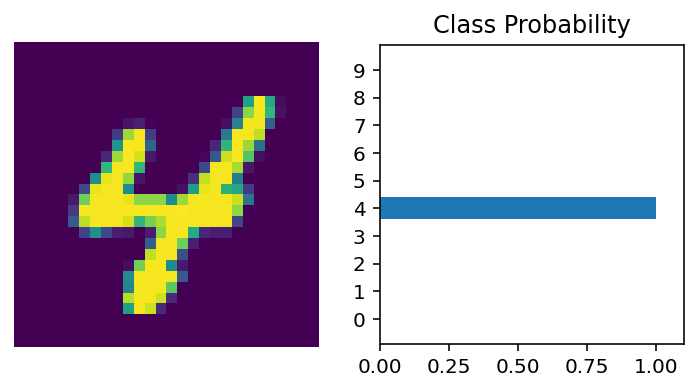

In [115]:
view_classify(img.reshape(28,28), torch.exp(model(img)))

In [114]:
epochs = 1
print_every = 1000
for e in range(epochs):
    running_loss = 0
    print(f"Epoch:{e+1}")
    for i, (images, labels) in enumerate(iter(trainloader)):
        # images.resize_(images.shape[0], 784)
        optimizer.zero_grad()
        output = model(images.view(images.shape[0], 784))
        loss = criterion(output, labels)
        running_loss += loss.data.numpy()
        loss.backward()
        optimizer.step()
        if i % print_every == 0:
            print(f"Epoch: {e+1}, loss: {running_loss/print_every}")
            running_loss = 0
        

Epoch:1
Epoch: 1, loss: 0.002336162805557251
Epoch: 1, loss: 0.6552743660472333
Epoch: 1, loss: 0.45175788045488297
Epoch: 1, loss: 0.43096385240647944


In [93]:
dictionary = {"1":5, "2":4}

In [94]:
for x in dictionary:
    print(x)

1
2


In [95]:
dictionary["1"]

5